## Analysis

In [41]:
#create _describe.csv
import pandas as pd

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"
folderoutput = f"../workdir/AIS-Images/{filename}/"

pd.set_option("display.float_format", lambda x: '%.1f' % x)

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


df_res_dis = [0]*5*3*10
i = 0

for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        #for alg in ("bl_", "lr_", "ml50_", "ml5_", "as_"):
        for alg in ("bl_", "lr_", "ml50_", "ml5_", "as_"):
            df_res_dis[i] = (df_res[f"{alg}{known}w{noise}"].describe())
            i = i + 1



df_res_dis = str(df_res_dis)

df_res_dis = df_res_dis.replace("           ", ";")
df_res_dis = df_res_dis.replace("          ", ";")
df_res_dis = df_res_dis.replace("         ", ";")
df_res_dis = df_res_dis.replace("        ", ";")
df_res_dis = df_res_dis.replace("       ", ";")
df_res_dis = df_res_dis.replace("      ", ";")
df_res_dis = df_res_dis.replace("     ", ";")
df_res_dis = df_res_dis.replace("    ", ";")
df_res_dis = df_res_dis.replace("   ", ";")
df_res_dis = df_res_dis.replace("  ", ";")
df_res_dis = df_res_dis.replace("   ", ";")


## creating a new empty file or overwriting existend file
save_file = open(f"{folderoutput}{filename}_describe.csv", "w")
save_file.write(df_res_dis)
save_file.close()


## Visualisation

In [42]:
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"
folderoutput = "../workdir/AIS-Images/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

df_res.head(4)

,bl_3w0,lr_3w0,ml50_3w0,ml5_3w0,as_3w0,bl_3w5,lr_3w5,ml50_3w5,ml5_3w5,as_3w5,...,bl_12w5,lr_12w5,ml50_12w5,ml5_12w5,as_12w5,bl_12w10,lr_12w10,ml50_12w10,ml5_12w10,as_12w10
0,0.6,1.6,1.8,3.9,1.8,2.3,7.6,7.2,10.3,8.6,...,9.2,46.3,15.3,27.2,11.6,9.1,41.8,10.8,20.8,13.7
1,58.9,5.6,2.0,6.1,3.6,66.0,14.6,10.7,7.5,16.1,...,48.6,2.2,0.7,1.4,2.5,34.8,14.7,15.7,17.0,18.9
2,57.6,4.1,1.4,6.8,6.1,60.7,4.6,6.1,6.9,5.6,...,11.0,10.2,10.1,9.1,8.6,32.7,28.7,29.5,27.3,26.8
3,7.8,19.2,1.2,5.9,3.2,10.9,18.6,5.9,6.9,5.1,...,27.8,10.7,3.5,3.9,6.8,38.8,25.1,17.7,20.6,25.4


In [43]:
#Boxplot A_A_X

import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# BL vs XX 3 bis 12 -> 3 Bilder
for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
#     for alg in ("lr", "nn", "as"):
        df_loc = df_res.copy()

        # df_loc = df_loc.filter(regex=f"bl|{alg}")
        df_loc = df_loc.filter(regex=f"_{known}w")
        df_loc = df_loc.filter(regex=f"w{noise}")
        df_loc = df_loc.filter(regex=f"bl|lr|ml50|ml5|as")

        
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression"})
        df_loc = df_loc.rename(columns={f"ml50_{known}w{noise}": f"MLP Regressor 50 Knoten"})
        df_loc = df_loc.rename(columns={f"ml5_{known}w{noise}": f"MLP Regressor 5 Knoten"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn"})

        df_loc.boxplot(showfliers=False, rot=90)
        
        plt.legend(bbox_to_anchor=(1.0, 1.0))
        plt.grid(linestyle = '--', linewidth = 0.5)
        plt.xlabel('Vorhersagemethode')
        plt.ylabel('Präzision in [m]')

        plt.show
        plt.savefig(f"{folderoutput}{filename}_test_{known}_{noise}_X.png", bbox_inches='tight', dpi=600)
        df_loc = []
        plt.cla()

/tmp/ipykernel_54029/786873631.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.0, 1.0))
/tmp/ipykernel_54029/786873631.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.0, 1.0))
/tmp/ipykernel_54029/786873631.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.0, 1.0))
/tmp/ipykernel_54029/786873631.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.0, 1.0))
/tmp/ipy

In [44]:
#Box plot X_A_A
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


# # sorting columns
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
#         for alg in ['as', 'ml', 'lr', 'bl']:
        

#             first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
#             df_tmp = df_res.copy()
#             df_res = []
#             df_res = df_tmp.copy()
#             df_tmp = []
 
#             df_res.insert(0, f"{alg}_{known}w{noise}", first_column)


# BL vs XX 3 bis 12 -> 3 Bilder
for noise in range(0, 11, 5):
    for alg in ("bl", "lr", "ml50", "ml5", "as"):
        df_loc = df_res.copy()
        
        df_loc = df_loc.filter(regex=f"{alg}")
        df_loc = df_loc.filter(regex=f"w{noise}")

        plt.xlabel(f"Anzahl bekannter Positionen")

        for known in range(3, 13, 1):
            df_loc = df_loc.rename(columns={f"{alg}_{known}w{noise}": f"{known}"})

        df_loc.boxplot(showfliers=False, rot=90)
        plt.ylabel('Präzision in [m]')
        plt.grid(linestyle = '--', linewidth = 0.5)
        plt.savefig(f"{folderoutput}{filename}_test_X_{noise}_{alg}.png", bbox_inches='tight', dpi=600)
        print('Saving Success')
        df_loc = []
        plt.cla()

Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success
Saving Success


In [45]:
#Box plot A_X_X Seaborn
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"
#filename = "aisdk-2023-11-08-xs_3_knn_result"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


# sorting columns
#known = 3
#noise = 0
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
#df_res = df_res.drop([f"known_{known}_{noise}"], axis=1)
#df_res = df_res.drop([f"noise_{known}_{noise}"], axis=1)

known = 9
df_loc = df_res#.copy()
df_loc = df_loc.filter(regex=f"_{known}w")

for noise in range(0, 11, 5):
    # if (noise == 0):
    #     df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline ohne Rauschen"})
    #     df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression ohne Rauschen"})
    #     df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor ohne Rauschen"})
    #     df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn ohne Rauschen"})
    # else:
    df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline {noise} m Std. Abw. R."})
    df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression {noise} m Std. Abw. R."})
    df_loc = df_loc.rename(columns={f"ml50_{known}w{noise}": f"MLP Regressor 50 Knoten {noise} m Std. Abw. R."})
    df_loc = df_loc.rename(columns={f"ml5_{known}w{noise}": f"MLP Regressor 5 Knoten {noise} m Std. Abw. R."})
    df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn {noise} m Std. Abw. R."})

        

sns.set_style("whitegrid")
ax = sns.boxplot(df_loc, showfliers=False)
ax.set(ylabel=f'Präzision in [m]', xlabel='Vorhersagemethode')
plt.grid(linestyle = '--', linewidth = 0.5)
ax.tick_params(axis='x', rotation=90)
fig = ax.get_figure()
fig.savefig(f"{folderoutput}{filename}_test_{known}_X_X_box_multi.png", bbox_inches='tight', dpi=600) 
ax = []
res_df = []
plt.clf()

In [46]:
# Median X_A_X Errorbar
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"
# filename = "aisdk-2023-11-08-xs_3_knn_result"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


# indeX = df_res.columns
indeX = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

# # sorting columns
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
#         for alg in ['as', 'ml50', 'ml5', 'lr', 'bl']:
#         # for alg in ['ml', 'lr', 'bl']:

#             first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
#             df_tmp = df_res.copy()
#             df_res = []
#             df_res = df_tmp.copy()
#             df_tmp = []
 
#             df_res.insert(0, f"{alg}_{known}w{noise}", first_column)


for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")
    


    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml50_{known}w{noise}": f"MLP Regressor 50 Knoten 50 Knoten_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml5_{known}w{noise}": f"MLP Regressor 5 Knoten_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn_{known}_{noise}"})
        df_loc[f" {known}"] = df_loc[f"Baseline_{known}_{noise}"] * 0 + 50
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0 - 10

    # df_tmp2 = df_loc[].copy()
    
    if noise == 0:
        markers = {'Baseline': 'v', 'Lineare Regression': 'v', 'MLP Regressor 50 Knoten': 'v', 'MLP Regressor 5 Knoten': 'v', 'Auto Sklearn': 'v', ' ': ' '}
        # indeX = [2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9]
    elif noise == 5:
        markers = {'Baseline': 's', 'Lineare Regression': 's', 'MLP Regressor 50 Knoten': 's', 'MLP Regressor 5 Knoten': 's', 'Auto Sklearn': 's', ' ': ' '}
        # indeX = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    else:
        markers = {'Baseline': 'p', 'Lineare Regression': 'p', 'MLP Regressor 50 Knoten': 'p', 'MLP Regressor 5 Knoten': 'p', 'Auto Sklearn': 'p', ' ': ' '}
        # indeX = [3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, 10.1, 11.1, 12.1]

    offset = {'Baseline': -0.20, 'Lineare Regression': -0.10, 'MLP Regressor 50 Knoten': 0.00, 'MLP Regressor 5 Knoten': 0.10, 'Auto Sklearn': 0.20, ' ': 0.0}

    colors = {'Baseline': 'b', 'Lineare Regression': 'r', 'MLP Regressor 50 Knoten': 'g', 'MLP Regressor 5 Knoten': 'm', 'Auto Sklearn': 'goldenrod', ' ': 'w'}

    for alg in ['Baseline', 'Lineare Regression', 'MLP Regressor 50 Knoten', 'MLP Regressor 5 Knoten', 'Auto Sklearn', ' ']:
        df_tmp = df_loc.filter(regex=f'^{alg}')
        # df_tmp[f'errorbar_{alg}'] = df_tmp.std(axis=1)
        # df_loc.filter(regex=f'^{alg}').median().plot(style='o', color=colors[alg], label=alg, rot=0) 
        # df_tmp.median().plot(style='o', color=colors[alg], label=alg, rot=0)
        # plt.errorbar(x=df_tmp.median().index, y=df_tmp.median().values, yerr=df_tmp.std().values, fmt='o', color=colors[alg], label=alg, capsize=5)
        # plt.errorbar(x=df_tmp.median().index, y=df_tmp.median().values, yerr=df_tmp.std().values, fmt=markers[alg], color=colors[alg], label=alg, capsize=5)
        plt.errorbar(x=[x - offset[alg] for x in indeX], y=df_tmp.median().values, yerr=df_tmp.std().values, fmt=markers[alg], color=colors[alg], label=alg, capsize=5, lw = 0.4)
        # plt.errorbar(x=df_tmp.median().index, y=df_tmp.median().values, yerr=df_tmp.std().values, fmt='o', color=colors[alg], label=alg, capsize=5)
        # plt.errorbar(x=df_loc.filter(regex=f'^{alg}').median().index, y=df_loc.filter(regex=f'^{alg}').median().values, yerr=df_loc.filter(regex=f'^{alg}').std().values, fmt='o', color=colors[alg], label=alg, capsize=5)
        #plt.errorbar(x=df_tmp.median().index, y=df_tmp.median().values, yerr=df_tmp.std().values, fmt='o', color=colors[alg], label=alg, capsize=5)
        df_tmp = []
    plt.grid(linestyle = '--', linewidth = 0.5)
    # plt.ylim(-10, 55)
    plt.ylabel('Präzision in [m]')
    plt.xlabel('Bekannte Positionen')

    plt.legend(bbox_to_anchor=(1.0, 1.0))

    plt.savefig(f"{folderoutput}{filename}_test_X_{noise}_X_Median_E_zoom_55_ohg.png", bbox_inches='tight', dpi=600, transparent=True)
    # plt.show()
    df_loc = []
    plt.cla()
# plt.show()
# plt.clf()

In [47]:
# Median X_A_X Errorbar Custome
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"
# filename = "aisdk-2023-11-08-xs_3_knn_result"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


# indeX = df_res.columns
indeX = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

# # sorting columns
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
#         for alg in ['as', 'ml50', 'ml5', 'lr', 'bl']:
#         # for alg in ['ml', 'lr', 'bl']:

#             first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
#             df_tmp = df_res.copy()
#             df_res = []
#             df_res = df_tmp.copy()
#             df_tmp = []
 
#             df_res.insert(0, f"{alg}_{known}w{noise}", first_column)


for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")
    


    for known in range(3, 13, 1):
        # df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline_{known}_{noise}"})
        # df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml50_{known}w{noise}": f"MLP Regressor 50 Knoten_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml5_{known}w{noise}": f"MLP Regressor 5 Knoten_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn_{known}_{noise}"})
        df_loc[f" {known}"] = df_loc[f"MLP Regressor 50 Knoten_{known}_{noise}"] * 0 + 50
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0 - 10

    # df_tmp2 = df_loc[].copy()
    
    if noise == 0:
        markers = {'Baseline': 'v', 'Lineare Regression': 'v', 'MLP Regressor 50 Knoten': 'v', 'MLP Regressor 5 Knoten' : 'v', 'Auto Sklearn': 'v', ' ': ' '}
        # indeX = [2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9]
    elif noise == 5:
        markers = {'Baseline': 's', 'Lineare Regression': 's', 'MLP Regressor 50 Knoten': 's', 'MLP Regressor 5 Knoten': 's', 'Auto Sklearn': 's', ' ': ' '}
        # indeX = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    else:
        markers = {'Baseline': 'p', 'Lineare Regression': 'p', 'MLP Regressor 50 Knoten': 'p', 'MLP Regressor 5 Knoten': 'p', 'Auto Sklearn': 'p', ' ': ' '}
        # indeX = [3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, 10.1, 11.1, 12.1]

    offset = {'Baseline': -0.15, 'Lineare Regression': -0.05, 'MLP Regressor 50 Knoten': 0.05, 'MLP Regressor 5 Knoten': 0.10, 'Auto Sklearn': 0.15, ' ': 0.0}

    colors = {'Baseline': 'b', 'Lineare Regression': 'r', 'MLP Regressor 50 Knoten': 'g', 'MLP Regressor 5 Knoten':'m', 'Auto Sklearn': 'goldenrod', ' ': 'w'}

    for alg in ['MLP Regressor 50 Knoten', 'MLP Regressor 5 Knoten', 'Auto Sklearn', ' ']:
        df_tmp = df_loc.filter(regex=f'^{alg}')
        # df_tmp[f'errorbar_{alg}'] = df_tmp.std(axis=1)
        # df_loc.filter(regex=f'^{alg}').median().plot(style='o', color=colors[alg], label=alg, rot=0) 
        # df_tmp.median().plot(style='o', color=colors[alg], label=alg, rot=0)
        # plt.errorbar(x=df_tmp.median().index, y=df_tmp.median().values, yerr=df_tmp.std().values, fmt='o', color=colors[alg], label=alg, capsize=5)
        # plt.errorbar(x=df_tmp.median().index, y=df_tmp.median().values, yerr=df_tmp.std().values, fmt=markers[alg], color=colors[alg], label=alg, capsize=5)
        plt.errorbar(x=[x - offset[alg] for x in indeX], y=df_tmp.median().values, yerr=df_tmp.std().values, fmt=markers[alg], color=colors[alg], label=alg, capsize=5, lw = 0.4)
        # plt.errorbar(x=df_tmp.median().index, y=df_tmp.median().values, yerr=df_tmp.std().values, fmt='o', color=colors[alg], label=alg, capsize=5)
        # plt.errorbar(x=df_loc.filter(regex=f'^{alg}').median().index, y=df_loc.filter(regex=f'^{alg}').median().values, yerr=df_loc.filter(regex=f'^{alg}').std().values, fmt='o', color=colors[alg], label=alg, capsize=5)
        #plt.errorbar(x=df_tmp.median().index, y=df_tmp.median().values, yerr=df_tmp.std().values, fmt='o', color=colors[alg], label=alg, capsize=5)
        df_tmp = []
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.ylim(-10, 55)
    plt.ylabel('Präzision in [m]')
    plt.xlabel('Bekannte Positionen')

    plt.legend(bbox_to_anchor=(1.0, 1.0))

    plt.savefig(f"{folderoutput}{filename}_test_X_{noise}_X_Median_E_zoom_55_C_ohg.png", bbox_inches='tight', dpi=600, transparent=True)
    # plt.show()
    df_loc = []
    plt.cla()
# plt.show()
# plt.clf()

In [48]:
# Outliere X_A_X Calculation
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")
var_list = []

# # sorting columns
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
#         for alg in ['as', 'ml50', 'ml5', 'lr', 'bl']:
#         #for alg in ['ml', 'lr', 'bl']:

#             first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
#             df_tmp = df_res.copy()
#             df_res = []
#             df_res = df_tmp.copy()
#             df_tmp = []
 
#             df_res.insert(0, f"{alg}_{known}w{noise}", first_column)



for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")
    
    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml50_{known}w{noise}": f"MLP Regressor 50 Knoten_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml5_{known}w{noise}": f"MLP Regressor 5 Knoten_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn_{known}_{noise}"})


    for alg in ['Baseline', 'Lineare Regression', 'MLP Regressor 50 Knoten', 'MLP Regressor 5 Knoten', 'Auto Sklearn']: 
        for known in range (3, 13, 1):

            # Filter for outliers
            Q1 = df_loc[f"{alg}_{known}_{noise}"].quantile(0.25)
            Q3 = df_loc[f"{alg}_{known}_{noise}"].quantile(0.75)
            IQR = Q3 - Q1    #IQR is interquartile range. 

            df_loc[f'fi_{alg}_{known}_{noise}'] = (df_loc[f"{alg}_{known}_{noise}"] >= Q1 - 1.5 * IQR) & (df_loc[f"{alg}_{known}_{noise}"] <= Q3 + 1.5 *IQR)
            
            print(df_loc[f'fi_{alg}_{known}_{noise}'].value_counts())
            
            var_list.append(df_loc[f'fi_{alg}_{known}_{noise}'].value_counts())
            
var_list = str(var_list)
var_list = var_list.replace("False", "")


save_file = open(f"{folderoutput}{filename}_outliers.csv", "w")
save_file.write(var_list)
save_file.close()


fi_Baseline_3_0
True     1257104
False       7696
Name: count, dtype: int64
fi_Baseline_4_0
True     1257130
False       7670
Name: count, dtype: int64
fi_Baseline_5_0
True     1257121
False       7679
Name: count, dtype: int64
fi_Baseline_6_0
True     1257267
False       7533
Name: count, dtype: int64
fi_Baseline_7_0
True     1257264
False       7536
Name: count, dtype: int64
fi_Baseline_8_0
True     1257226
False       7574
Name: count, dtype: int64
fi_Baseline_9_0
True     1257244
False       7556
Name: count, dtype: int64
fi_Baseline_10_0
True     1257240
False       7560
Name: count, dtype: int64
fi_Baseline_11_0
True     1257272
False       7528
Name: count, dtype: int64
fi_Baseline_12_0
True     1257272
False       7528
Name: count, dtype: int64
fi_Lineare Regression_3_0
True     1143762
False     121038
Name: count, dtype: int64
fi_Lineare Regression_4_0
True     1145517
False     119283
Name: count, dtype: int64
fi_Lineare Regression_5_0
True     1152780
False     112020
Name:

In [49]:
# Outliere X_A_X r
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")
var_list = []

for known in range (3, 13, 1):

    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"{known}w")

    for noise in range(0, 11, 5):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml50_{known}w{noise}": f"MLP Regressor 50 Knoten_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml5_{known}w{noise}": f"MLP Regressor 5 Knoten_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn_{known}_{noise}"})
        for alg in ['Baseline', 'Lineare Regression', 'MLP Regressor 50 Knoten', 'MLP Regressor 5 Knoten',  'Auto Sklearn']:
        
            

            # Filter for outliers
            Q1 = df_loc[f"{alg}_{known}_{noise}"].quantile(0.25)
            Q3 = df_loc[f"{alg}_{known}_{noise}"].quantile(0.75)
            IQR = Q3 - Q1    #IQR is interquartile range. 

            df_loc[f'fi_{alg}_{known}_{noise}'] = (df_loc[f"{alg}_{known}_{noise}"] >= Q1 - 1.5 * IQR) & (df_loc[f"{alg}_{known}_{noise}"] <= Q3 + 1.5 *IQR)
            
            print(df_loc[f'fi_{alg}_{known}_{noise}'].value_counts())
            
            
            var_list.append(df_loc[f'fi_{alg}_{known}_{noise}'].value_counts())

var_list = str(var_list)
var_list = var_list.replace("False", "\n\n\n\n\n")


save_file = open(f"{folderoutput}{filename}_outliers_r.csv", "w")
save_file.write(var_list)
save_file.close()


fi_Baseline_3_0
True     1257104
False       7696
Name: count, dtype: int64
fi_Lineare Regression_3_0
True     1143762
False     121038
Name: count, dtype: int64
fi_MLP Regressor 50 Knoten_3_0
True     1189879
False      74921
Name: count, dtype: int64
fi_MLP Regressor 5 Knoten_3_0
True     1174491
False      90309
Name: count, dtype: int64
fi_Auto Sklearn_3_0
True     1183261
False      81539
Name: count, dtype: int64
fi_Baseline_3_5
True     1254970
False       9830
Name: count, dtype: int64
fi_Lineare Regression_3_5
True     1173711
False      91089
Name: count, dtype: int64
fi_MLP Regressor 50 Knoten_3_5
True     1227595
False      37205
Name: count, dtype: int64
fi_MLP Regressor 5 Knoten_3_5
True     1210424
False      54376
Name: count, dtype: int64
fi_Auto Sklearn_3_5
True     1224605
False      40195
Name: count, dtype: int64
fi_Baseline_3_10
True     1252573
False      12227
Name: count, dtype: int64
fi_Lineare Regression_3_10
True     1214391
False      50409
Name: count, dty

In [50]:
# Outlier Graph

data ={ 'Baseline s = 0 m':    [0.502452479,	0.505149486,	0.507127292,	0.498766569,	0.496968564,	0.498137267,	0.497777666,	0.493552354,	0.500564574,	0.500564574],
        'Lineare Regression s = 0 m':    [10.30346727,	10.51931777,	9.40590321,	9.595772531,	9.524481635,	9.495353955,	9.360953086,	9.349355955,	9.43521069,	9.399610193],
        'MLP Regressor 50 Knoten s = 0 m':    [6.241864028,	6.562448307,	6.229637594,	6.032216652,	6.316481232,	6.197543206,	6.323403551,	6.087954805,	6.258046072,	6.155829492],
        'MLP Regressor 5 Knoten s = 0 m':    [6.241864028,	6.562448307,	6.229637594,	6.032216652,	6.316481232,	6.197543206,	6.323403551,	6.087954805,	6.258046072,	6.155829492],
        'Auto Sklearn s = 0 m':    [6.570449429,	6.374736592,	6.611174241,	6.428227239,	6.985069367,	6.803201168,	6.707996807,	6.658821372,	6.732090073,	6.632120999],
        ' ': [0, 0, 0, 0, 0, 0, 0, 0, 0, 12],
        'Baseline s = 5 m':    [0.674971052,	0.675780154,	0.685759082,	0.676229656,	0.67416195,	0.675150853,	0.67407205,	0.670835641,	0.67766806,	0.679286264],
        'Lineare Regression s = 5 m':    [7.44895464,	7.724498896,	7.329926713,	7.37622534,	7.40508332,	7.418927958,	7.362830204,	7.339995541,	7.358964493,	7.338916738],
        'MLP Regressor 50 Knoten s = 5 m':    [2.920948915,	2.827093058,	2.726404781,	2.719482462,	2.724606776,	2.832127471,	2.838060888,	2.831138569,	2.865390563,	2.867458268],
        'MLP Regressor 5 Knoten s = 5 m':    [6.241864028,	6.562448307,	6.229637594,	6.032216652,	6.316481232,	6.197543206,	6.323403551,	6.087954805,	6.258046072,	6.155829492],
        'Auto Sklearn s = 5 m':    [3.157206763,	3.21411362,	3.575782312,	3.728972332,	3.820670584,	3.958577562,	4.265227304,	4.42066483,	4.481347497,	4.585631783],
        '5': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'Baseline s = 10 m':    [4.585631783,	0.86735758,	0.865379775,	0.876437505,	0.873201096,	0.869335385,	0.868346483,	0.865829276,	0.860525161,	0.871403091],
        'Lineare Regression s = 10 m':    [0.865739376,	3.980063721,	4.113205987,	4.304333911,	4.284286156,	4.367443884,	4.36231957,	4.341013212,	4.377692512,	4.39513316],
        'MLP Regressor 50 Knoten s = 10 m':    [4.378861216,	2.475223492,	2.408607409,	2.409596312,	2.434139079,	2.440072496,	2.563145933,	2.500305661,	2.5510094,	2.540311271],
        'MLP Regressor 5 Knoten s = 10 m':    [6.241864028,	6.562448307,	6.229637594,	6.032216652,	6.316481232,	6.197543206,	6.323403551,	6.087954805,	6.258046072,	6.155829492],
        'Auto Sklearn s = 10 m':    [2.516937206,	2.520083715,	2.555684213,	2.602432341,	2.630391318,	2.716965255,	2.845522608,	2.906744676,	3.042224348,	2.971562754],
        '10': [0, 0, 0, 0, 0, 0, 0, 0, 0, 12],
       'numb':      [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
       }

for noise in range(0, 11, 5):

       if noise == 0:
              alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor 50 Knoten s = 0 m', 'MLP Regressor 5 Knoten s = 0 m', 'Auto Sklearn s = 0 m' , ' ']
              colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor 50 Knoten s = 0 m': 'g', 'MLP Regressor 5 Knoten s = 0 m': 'm', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 0 m': 'v', 'Lineare Regression s = 0 m': 'v', 'MLP Regressor 50 Knoten s = 0 m': 'v', 'MLP Regressor 5 Knoten s = 0 m': 'v', 'Auto Sklearn s = 0 m': 'v', ' ': ' '}

       elif noise == 5:
              alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor 50 Knoten s = 5 m', 'MLP Regressor 5 Knoten s = 5 m', 'Auto Sklearn s = 5 m', ' ']
              colors = {'Baseline s = 5 m': 'blue', 'Lineare Regression s = 5 m': 'red', 'MLP Regressor 50 Knoten s = 5 m': 'g', 'MLP Regressor 5 Knoten s = 5 m': 'm', 'Auto Sklearn s = 5 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 5 m': 's', 'Lineare Regression s = 5 m': 's', 'MLP Regressor 50 Knoten s = 5 m': 's', 'MLP Regressor 5 Knoten s = 5 m': 's', 'Auto Sklearn s = 5 m': 's', ' ': ' '}

       elif noise == 10:
              alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor 50 Knoten s = 10 m', 'MLP Regressor 5 Knoten s = 10 m', 'Auto Sklearn s = 10 m', ' ']
              colors = {'Baseline s = 10 m': 'blue', 'Lineare Regression s = 10 m': 'red', 'MLP Regressor 50 Knoten s = 10 m': 'g', 'MLP Regressor 5 Knoten s = 10 m': 'm', 'Auto Sklearn s = 10 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 10 m': 'p', 'Lineare Regression s = 10 m': 'p', 'MLP Regressor 50 Knoten s = 10 m': 'p', 'MLP Regressor 5 Knoten s = 10 m': 'p', 'Auto Sklearn s = 10 m': 'p', ' ': ' '}


       for alg in [f'Baseline s = {noise} m', f'Lineare Regression s = {noise} m', f'MLP Regressor 50 Knoten s = {noise} m', f'MLP Regressor 5 Knoten s = {noise} m', f'Auto Sklearn s = {noise} m', f' ']:
              plt.plot(data['numb'], data[f"{alg}"], color=colors[alg], label=alg, marker=markers[alg], linestyle='None')

#sns.scatterplot(data=data) #, x='Bekannte Positionen', y='Ausreißer [m]') #, color=colors[], label='Baseline s = 0 m')

plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel('Bekannte Positionen')
plt.ylabel('Ausreißer [%]')
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig(f"{folderoutput}{filename}_test_X_X_X_Outlier.png", bbox_inches='tight', dpi=600)
#plt.show
df_loc = []
plt.cla()

In [51]:
# Median X_X_X
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# # sorting columns
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
#         for alg in ['as', 'ml50', 'ml5', 'lr', 'bl']:

#             first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
#             df_tmp = df_res.copy()
#             df_res = []
#             df_res = df_tmp.copy()
#             df_tmp = []
 
#             df_res.insert(0, f"{alg}_{known}w{noise}", first_column)



for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")

    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml50_{known}w{noise}": f"MLP Regressor 50 Knoten s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml5_{known}w{noise}": f"MLP Regressor 5 Knoten s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn s = {noise} m {known}"})
        df_loc[f" {known}"] = df_loc[f"Baseline s = {noise} m {known}"] * 0 + 30
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0

    if noise == 0:
              alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor 50 Knoten s = 0 m', 'MLP Regressor 5 Knoten s = 0 m', 'Auto Sklearn s = 0 m' , ' ']
              colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor 50 Knoten s = 0 m': 'g', 'MLP Regressor 5 Knoten s = 0 m': 'm', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 0 m': 'v', 'Lineare Regression s = 0 m': 'v', 'MLP Regressor 50 Knoten s = 0 m': 'v', 'MLP Regressor 5 Knoten s = 0 m': 'v', 'Auto Sklearn s = 0 m': 'v', ' ': ' '}

    elif noise == 5:
              alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor 50 Knoten s = 5 m', 'MLP Regressor 5 Knoten s = 5 m', 'Auto Sklearn s = 5 m', ' ']
              colors = {'Baseline s = 5 m': 'blue', 'Lineare Regression s = 5 m': 'red', 'MLP Regressor 50 Knoten s = 5 m': 'g', 'MLP Regressor 5 Knoten s = 5 m': 'm', 'Auto Sklearn s = 5 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 5 m': 's', 'Lineare Regression s = 5 m': 's', 'MLP Regressor 50 Knoten s = 5 m': 's', 'MLP Regressor 5 Knoten s = 5 m': 's', 'Auto Sklearn s = 5 m': 's', ' ': ' '}

    elif noise == 10:
              alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor 50 Knoten s = 10 m', 'MLP Regressor 5 Knoten s = 10 m', 'Auto Sklearn s = 10 m', ' ']
              colors = {'Baseline s = 10 m': 'blue', 'Lineare Regression s = 10 m': 'red', 'MLP Regressor 50 Knoten s = 10 m': 'g', 'MLP Regressor 5 Knoten s = 10 m': 'm', 'Auto Sklearn s = 10 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 10 m': 'p', 'Lineare Regression s = 10 m': 'p', 'MLP Regressor 50 Knoten s = 10 m': 'p', 'MLP Regressor 5 Knoten s = 10 m': 'p', 'Auto Sklearn s = 10 m': 'p', ' ': ' '}


    for alg in alg_def:
        df_loc.filter(regex=f'^{alg}').median().plot(style='o', color=colors[alg], label=alg, rot=0, marker=markers[alg]) #, figsize=(10, 10))

plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylabel('Präzision in [m]')
plt.xlabel('Bekannte Positionen')

plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig(f"{folderoutput}{filename}_test_X_X_X_Median_oHg.png", bbox_inches='tight', dpi=600, transparent=True)
df_loc = []
plt.cla()

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.

In [52]:
# Median X_X_X Custome
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# # sorting columns
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
#         for alg in ['as', 'ml50', 'ml5', 'lr', 'bl']:

#             first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
#             df_tmp = df_res.copy()
#             df_res = []
#             df_res = df_tmp.copy()
#             df_tmp = []
 
#             df_res.insert(0, f"{alg}_{known}w{noise}", first_column)



for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")

    for known in range(3, 13, 1):
        # df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline s = {noise} m {known}"})
        # df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml50_{known}w{noise}": f"MLP Regressor 50 Knoten s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml5_{known}w{noise}": f"MLP Regressor 5 Knoten s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn s = {noise} m {known}"})
        df_loc[f" {known}"] = df_loc[f"MLP Regressor 50 Knoten s = {noise} m {known}"] * 0 + 20
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0

    if noise == 0:
              alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor 50 Knoten s = 0 m', 'MLP Regressor 5 Knoten s = 0 m', 'Auto Sklearn s = 0 m' , ' ']
              colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor 50 Knoten s = 0 m': 'g', 'MLP Regressor 5 Knoten s = 0 m': 'm', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 0 m': 'v', 'Lineare Regression s = 0 m': 'v', 'MLP Regressor 50 Knoten s = 0 m': 'v', 'MLP Regressor 5 Knoten s = 0 m': 'v', 'Auto Sklearn s = 0 m': 'v', ' ': ' '}

    elif noise == 5:
              alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor 50 Knoten s = 5 m', 'MLP Regressor 5 Knoten s = 5 m', 'Auto Sklearn s = 5 m', ' ']
              colors = {'Baseline s = 5 m': 'blue', 'Lineare Regression s = 5 m': 'red', 'MLP Regressor 50 Knoten s = 5 m': 'g', 'MLP Regressor 5 Knoten s = 5 m': 'm', 'Auto Sklearn s = 5 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 5 m': 's', 'Lineare Regression s = 5 m': 's', 'MLP Regressor 50 Knoten s = 5 m': 's', 'MLP Regressor 5 Knoten s = 5 m': 's', 'Auto Sklearn s = 5 m': 's', ' ': ' '}

    elif noise == 10:
              alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor 50 Knoten s = 10 m', 'MLP Regressor 5 Knoten s = 10 m', 'Auto Sklearn s = 10 m', ' ']
              colors = {'Baseline s = 10 m': 'blue', 'Lineare Regression s = 10 m': 'red', 'MLP Regressor 50 Knoten s = 10 m': 'g', 'MLP Regressor 5 Knoten s = 10 m': 'm', 'Auto Sklearn s = 10 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 10 m': 'p', 'Lineare Regression s = 10 m': 'p', 'MLP Regressor 50 Knoten s = 10 m': 'p', 'MLP Regressor 5 Knoten s = 10 m': 'p', 'Auto Sklearn s = 10 m': 'p', ' ': ' '}


    for alg in alg_def:
        df_loc.filter(regex=f'^{alg}').median().plot(style='o', color=colors[alg], label=alg, rot=0, marker=markers[alg]) #, figsize=(10, 10))

    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.ylabel('Präzision in [m]')
    plt.xlabel('Bekannte Positionen')
    plt.ylim(0, 20)
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    

    plt.savefig(f"{folderoutput}{filename}_test_X_{noise}_X_Median_c_oHg.png", bbox_inches='tight', dpi=600, transparent=True)
    df_loc = []
    plt.cla()

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.

In [53]:
# Std. Div X_X_X Sea
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df_loc = []
plt.cla()

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"
# filename = "aisdk-2023-11-08-xs_3_knn_result"

folderoutput = f"../workdir/AIS-Images/{filename}/"


df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# # sorting columns
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
#         for alg in ['as', 'ml50', 'ml5', 'lr', 'bl']:
#         # for alg in ['ml', 'lr', 'bl']:

#             first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
#             df_tmp = df_res.copy()
#             df_res = []
#             df_res = df_tmp.copy()
#             df_tmp = []
 
#             df_res.insert(0, f"{alg}_{known}w{noise}", first_column)



for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")

    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml50_{known}w{noise}": f"MLP Regressor 50 Knoten s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml5_{known}w{noise}": f"MLP Regressor 5 Knoten s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn s = {noise} m {known}"})
        df_loc[f" {known}"] = df_loc[f"Baseline s = {noise} m {known}"] * 0 + 30
        # df_loc[f" index"] = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0

    if noise == 0:
              alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor 50 Knoten s = 0 m', 'MLP Regressor 5 Knoten s = 0 m', 'Auto Sklearn s = 0 m' , ' ']
              colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor 50 Knoten s = 0 m': 'g', 'MLP Regressor 5 Knoten s = 0 m': 'm', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 0 m': 'v', 'Lineare Regression s = 0 m': 'v', 'MLP Regressor 50 Knoten s = 0 m': 'v', 'MLP Regressor 5 Knoten s = 0 m': 'v', 'Auto Sklearn s = 0 m': 'v', ' ': ' '}

    elif noise == 5:
              alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor 50 Knoten s = 5 m', 'MLP Regressor 5 Knoten s = 5 m', 'Auto Sklearn s = 5 m', ' ']
              colors = {'Baseline s = 5 m': 'blue', 'Lineare Regression s = 5 m': 'red', 'MLP Regressor 50 Knoten s = 5 m': 'g', 'MLP Regressor 5 Knoten s = 5 m': 'm', 'Auto Sklearn s = 5 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 5 m': 's', 'Lineare Regression s = 5 m': 's', 'MLP Regressor 50 Knoten s = 5 m': 's', 'MLP Regressor 5 Knoten s = 5 m': 's', 'Auto Sklearn s = 5 m': 's', ' ': ' '}

    elif noise == 10:
              alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor 50 Knoten s = 10 m', 'MLP Regressor 5 Knoten s = 10 m', 'Auto Sklearn s = 10 m', ' ']
              colors = {'Baseline s = 10 m': 'blue', 'Lineare Regression s = 10 m': 'red', 'MLP Regressor 50 Knoten s = 10 m': 'g', 'MLP Regressor 5 Knoten s = 10 m': 'm', 'Auto Sklearn s = 10 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 10 m': 'p', 'Lineare Regression s = 10 m': 'p', 'MLP Regressor 50 Knoten s = 10 m': 'p', 'MLP Regressor 5 Knoten s = 10 m': 'p', 'Auto Sklearn s = 10 m': 'p', ' ': ' '}

    for alg in alg_def:
        df_tmp = df_loc.filter(regex=f'^{alg}')
        df_tmp.std().plot(style=markers[alg], color=colors[alg], label=alg, rot=0) #, figsize=(10, 10))
        # medians = df_loc.median()
        # std_devs = df_loc.std()

        # df_loc.filter(regex=f'^{alg}').median().plot(style=markers[alg], color=colors[alg], label=alg, rot=0) #, figsize=(10, 10))
        #df_loc.filter(regex=f'^{alg}').plot.errorbar(x=medians.index, y=medians, yerr=std_devs, fmt=markers[alg], color=colors[alg], label=alg, rot=0) #, figsize=(10, 10))
        #median().plot(style=markers[alg], color=colors[alg], label=alg, rot=0) #, figsize=(10, 10))



plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylabel('Präzision in [m]')
plt.xlabel('Bekannte Positionen')
plt.ylim(0, 30)

plt.legend(bbox_to_anchor=(1.0, 1.0))

#plt.show()
plt.savefig(f"{folderoutput}{filename}_test_X_X_X_Std_Div_oHg.png", bbox_inches='tight', dpi=600, transparent=True)
# df_loc = []
plt.cla()

In [54]:
# Median E X_X_X Sea
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df_loc = []
plt.cla()

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"
# filename = "aisdk-2023-11-08-xs_3_knn_result"

folderoutput = f"../workdir/AIS-Images/{filename}/"

# indeX = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
indeX = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# # sorting columns
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
#         for alg in ['as', 'ml50', 'ml5', 'lr', 'bl']:
#         # for alg in ['ml', 'lr', 'bl']:

#             first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
#             df_tmp = df_res.copy()
#             df_res = []
#             df_res = df_tmp.copy()
#             df_tmp = []
 
#             df_res.insert(0, f"{alg}_{known}w{noise}", first_column)



for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")

    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml50_{known}w{noise}": f"MLP Regressor 50 Knoten s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml5_{known}w{noise}": f"MLP Regressor 5 Knoten s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn s = {noise} m {known}"})
        df_loc[f" {known}"] = df_loc[f"MLP Regressor 50 Knoten s = {noise} m {known}"] * 0 + 30
        # df_loc[f" index"] = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0

    if noise == 0:
              alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor 50 Knoten s = 0 m', 'MLP Regressor 5 Knoten s = 0 m', 'Auto Sklearn s = 0 m' , ' ']
              colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor 50 Knoten s = 0 m': 'g', 'MLP Regressor 5 Knoten s = 0 m': 'm', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 0 m': 'v', 'Lineare Regression s = 0 m': 'v', 'MLP Regressor 50 Knoten s = 0 m': 'v', 'MLP Regressor 5 Knoten s = 0 m': 'v', 'Auto Sklearn s = 0 m': 'v', ' ': ' '}
              offset = {'Baseline s = 0 m': -0.35, 'Lineare Regression s = 0 m': -0.30, 'MLP Regressor 50 Knoten s = 0 m': -0.25, 'MLP Regressor 5 Knoten s = 0 m': -0.20, 'Auto Sklearn s = 0 m': -0.15, ' ': 0.0}

    elif noise == 5:
              alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor 50 Knoten s = 5 m', 'MLP Regressor 5 Knoten s = 5 m', 'Auto Sklearn s = 5 m', ' ']
              colors = {'Baseline s = 5 m': 'blue', 'Lineare Regression s = 5 m': 'red', 'MLP Regressor 50 Knoten s = 5 m': 'g', 'MLP Regressor 5 Knoten s = 5 m': 'm', 'Auto Sklearn s = 5 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 5 m': 's', 'Lineare Regression s = 5 m': 's', 'MLP Regressor 50 Knoten s = 5 m': 's', 'MLP Regressor 5 Knoten s = 5 m': 's', 'Auto Sklearn s = 5 m': 's', ' ': ' '}
              offset = {'Baseline s = 5 m': -0.10, 'Lineare Regression s = 5 m': -0.05, 'MLP Regressor 50 Knoten s = 5 m': 0.00, 'MLP Regressor 5 Knoten s = 5 m': 0.05, 'Auto Sklearn s = 5 m': 0.10, ' ': 0.0}

    elif noise == 10:
              alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor 50 Knoten s = 10 m', 'MLP Regressor 5 Knoten s = 10 m', 'Auto Sklearn s = 10 m', ' ']
              colors = {'Baseline s = 10 m': 'blue', 'Lineare Regression s = 10 m': 'red', 'MLP Regressor 50 Knoten s = 10 m': 'g', 'MLP Regressor 5 Knoten s = 10 m': 'm', 'Auto Sklearn s = 10 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 10 m': 'p', 'Lineare Regression s = 10 m': 'p', 'MLP Regressor 50 Knoten s = 10 m': 'p', 'MLP Regressor 5 Knoten s = 10 m': 'p', 'Auto Sklearn s = 10 m': 'p', ' ': ' '}
              offset = {'Baseline s = 10 m': 0.15, 'Lineare Regression s = 10 m': 0.20, 'MLP Regressor 50 Knoten s = 10 m': 0.25, 'MLP Regressor 5 Knoten s = 10 m': 0.30, 'Auto Sklearn s = 10 m': 0.35, ' ': 0.0}


    for alg in alg_def:
        df_tmp = df_loc.filter(regex=f'^{alg}')

        # print(df_tmp.head(4))
        print(alg)
        
        # plt.errorbar(x=[x - offset[alg] for x in indeX], y=df_tmp.median().values, yerr=df_tmp.std().values, fmt=markers[alg], color=colors[alg], label=alg, lw = 0.4) #, capsize=5
        plt.errorbar(x=[x - offset[alg] for x in indeX], y=df_tmp.median().values, yerr=df_tmp.std().values, fmt=markers[alg], color=colors[alg], label=alg, capsize=5, lw = 0.4)

plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylabel('Präzision in [m]')
plt.xlabel('Bekannte Positionen')
plt.ylim(-10, 55)

plt.legend(bbox_to_anchor=(1.0, 1.0))

# plt.show()
plt.savefig(f"{folderoutput}{filename}_test_X_X_X_Median_E_oHg.png", bbox_inches='tight', dpi=600, transparent=True)
df_loc = []
plt.cla()

Baseline s = 0 m
Lineare Regression s = 0 m
MLP Regressor 50 Knoten s = 0 m
MLP Regressor 5 Knoten s = 0 m
Auto Sklearn s = 0 m
 
Baseline s = 5 m
Lineare Regression s = 5 m
MLP Regressor 50 Knoten s = 5 m
MLP Regressor 5 Knoten s = 5 m
Auto Sklearn s = 5 m
 
Baseline s = 10 m
Lineare Regression s = 10 m
MLP Regressor 50 Knoten s = 10 m
MLP Regressor 5 Knoten s = 10 m
Auto Sklearn s = 10 m
 


In [55]:
# Median E X_X_X Sea
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df_loc = []
plt.cla()

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"
# filename = "aisdk-2023-11-08-xs_3_knn_result"

folderoutput = f"../workdir/AIS-Images/{filename}/"

# indeX = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
indeX = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# # sorting columns
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
#         for alg in ['as', 'ml50', 'ml5', 'lr', 'bl']:
#         # for alg in ['ml', 'lr', 'bl']:

#             first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
#             df_tmp = df_res.copy()
#             df_res = []
#             df_res = df_tmp.copy()
#             df_tmp = []
 
#             df_res.insert(0, f"{alg}_{known}w{noise}", first_column)



for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")

    for known in range(3, 13, 1):
        # df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline s = {noise} m {known}"})
        # df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml50_{known}w{noise}": f"MLP Regressor 50 Knoten s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml5_{known}w{noise}": f"MLP Regressor 5 Knoten s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn s = {noise} m {known}"})
        df_loc[f" {known}"] = df_loc[f"MLP Regressor 50 Knoten s = {noise} m {known}"] * 0 + 30
        # df_loc[f" index"] = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0

    if noise == 0:
              alg_def = ['MLP Regressor 50 Knoten s = 0 m', 'MLP Regressor 5 Knoten s = 0 m', 'Auto Sklearn s = 0 m' , ' ']
              colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor 50 Knoten s = 0 m': 'g', 'MLP Regressor 5 Knoten s = 0 m': 'm', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 0 m': 'v', 'Lineare Regression s = 0 m': 'v', 'MLP Regressor 50 Knoten s = 0 m': 'v', 'MLP Regressor 5 Knoten s = 0 m': 'v', 'Auto Sklearn s = 0 m': 'v', ' ': ' '}
              offset = {'Baseline s = 0 m': -0.35, 'Lineare Regression s = 0 m': -0.30, 'MLP Regressor 50 Knoten s = 0 m': -0.25, 'MLP Regressor 5 Knoten s = 0 m': -0.20, 'Auto Sklearn s = 0 m': -0.15, ' ': 0.0}

    elif noise == 5:
              alg_def = ['MLP Regressor 50 Knoten s = 5 m', 'MLP Regressor 5 Knoten s = 5 m', 'Auto Sklearn s = 5 m', ' ']
              colors = {'Baseline s = 5 m': 'blue', 'Lineare Regression s = 5 m': 'red', 'MLP Regressor 50 Knoten s = 5 m': 'g', 'MLP Regressor 5 Knoten s = 5 m': 'm', 'Auto Sklearn s = 5 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 5 m': 's', 'Lineare Regression s = 5 m': 's', 'MLP Regressor 50 Knoten s = 5 m': 's', 'MLP Regressor 5 Knoten s = 5 m': 's', 'Auto Sklearn s = 5 m': 's', ' ': ' '}
              offset = {'Baseline s = 5 m': -0.10, 'Lineare Regression s = 5 m': -0.05, 'MLP Regressor 50 Knoten s = 5 m': 0.00, 'MLP Regressor 5 Knoten s = 5 m': 0.05, 'Auto Sklearn s = 5 m': 0.10, ' ': 0.0}

    elif noise == 10:
              alg_def = ['MLP Regressor 50 Knoten s = 10 m', 'MLP Regressor 5 Knoten s = 10 m', 'Auto Sklearn s = 10 m', ' ']
              colors = {'Baseline s = 10 m': 'blue', 'Lineare Regression s = 10 m': 'red', 'MLP Regressor 50 Knoten s = 10 m': 'g', 'MLP Regressor 5 Knoten s = 10 m': 'm', 'Auto Sklearn s = 10 m': 'goldenrod', ' ': 'w'}
              markers = {'Baseline s = 10 m': 'p', 'Lineare Regression s = 10 m': 'p', 'MLP Regressor 50 Knoten s = 10 m': 'p', 'MLP Regressor 5 Knoten s = 10 m': 'p', 'Auto Sklearn s = 10 m': 'p', ' ': ' '}
              offset = {'Baseline s = 10 m': 0.15, 'Lineare Regression s = 10 m': 0.20, 'MLP Regressor 50 Knoten s = 10 m': 0.25, 'MLP Regressor 5 Knoten s = 10 m': 0.30, 'Auto Sklearn s = 10 m': 0.35, ' ': 0.0}

    for alg in alg_def:
        df_tmp = df_loc.filter(regex=f'^{alg}')

        # print(df_tmp.head(4))
        print(alg)
        
        # plt.errorbar(x=[x - offset[alg] for x in indeX], y=df_tmp.median().values, yerr=df_tmp.std().values, fmt=markers[alg], color=colors[alg], label=alg, lw = 0.4) #, capsize=5
        plt.errorbar(x=[x - offset[alg] for x in indeX], y=df_tmp.median().values, yerr=df_tmp.std().values, fmt=markers[alg], color=colors[alg], label=alg, capsize=5, lw = 0.4)

plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylabel('Präzision in [m]')
plt.xlabel('Bekannte Positionen')
plt.ylim(-10, 30)

plt.legend(bbox_to_anchor=(1.0, 1.0))

# plt.show()
plt.savefig(f"{folderoutput}{filename}_test_X_X_X_Median_E_scal_c_oHg.png", bbox_inches='tight', dpi=600, transparent=True)
df_loc = []
plt.cla()

MLP Regressor 50 Knoten s = 0 m
MLP Regressor 5 Knoten s = 0 m
Auto Sklearn s = 0 m
 
MLP Regressor 50 Knoten s = 5 m
MLP Regressor 5 Knoten s = 5 m
Auto Sklearn s = 5 m
 
MLP Regressor 50 Knoten s = 10 m
MLP Regressor 5 Knoten s = 10 m
Auto Sklearn s = 10 m
 


In [56]:
# Box X_X_X
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_0302"
filename = f"aisdk-2023-11-09_1_knn_result_18000_10240_0302"
#filename = f"aisdk-2023-11-08-xs_3_knn_result"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# # sorting columns
# for known in range(12, 2, -1):
#     for noise in range(10, -1, -5):
#         #for alg in ['as', 'ml50', 'ml5', 'lr', 'bl']:
#         for alg in ['ml', 'lr', 'bl']:

#             first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
#             df_tmp = df_res.copy()
#             df_res = []
#             df_res = df_tmp.copy()
#             df_tmp = []
 
#             df_res.insert(0, f"{alg}_{known}w{noise}", first_column)

df_tmp = []
df_tmp = pd.DataFrame()
df_loc1 = pd.DataFrame()
# print(df_res.head(5))
df_loc = df_res.copy() 
#df_loc = df_loc.filter(items=[f'bl_3w', f'lr_3w', f'ml_3w', f'as_3w', f'bl_4w', f'lr_4w', f'ml_4w', f'as_4w', f'bl_5w', f'lr_5w', f'ml_5w', f'as_5w', f'bl_6w', f'lr_6w', f'ml_6w', f'as_6w', f'bl_7w', f'lr_7w', f'ml_7w', f'as_7w', f'bl_8w', f'lr_8w', f'ml_8w', f'as_8w', f'bl_9w', f'lr_9w', f'ml_9w', f'as_9w', f'bl_10w', f'lr_10w', f'ml_10w', f'as_10w', f'bl_11w', f'lr_11w', f'ml_11w', f'as_11w', f'bl_12w', f'lr_12w', f'ml_12w', f'as_12w'])
print(df_loc.head(5))
for noise in range(0, 11, 5):
      
    #df_loc = df_loc.filter(regex=f"w{noise}")
    #df_loc1 = df_loc.filter(items=[f'bl_3w{noise}', f'lr_3w{noise}', f'ml_3w{noise}', f'as_3w{noise}', f'bl_4w{noise}', f'lr_4w{noise}', f'ml_4w{noise}', f'as_4w{noise}', f'bl_5w{noise}', f'lr_5w{noise}', f'ml_5w{noise}', f'as_5w{noise}', f'bl_6w{noise}', f'lr_6w{noise}', f'ml_6w{noise}', f'as_6w{noise}', f'bl_7w{noise}', f'lr_7w{noise}', f'ml_7w{noise}', f'as_7w{noise}', f'bl_8w{noise}', f'lr_8w{noise}', f'ml_8w{noise}', f'as_8w{noise}', f'bl_9w{noise}', f'lr_9w{noise}', f'ml_9w{noise}', f'as_9w{noise}', f'bl_10w{noise}', f'lr_10w{noise}', f'ml_10w{noise}', f'as_10w{noise}', f'bl_11w{noise}', f'lr_11w{noise}', f'ml_11w{noise}', f'as_11w{noise}', f'bl_12w{noise}', f'lr_12w{noise}', f'ml_12w{noise}', f'as_12w{noise}'])
    df_loc1 = df_loc.filter(items=[f'bl_3w{noise}', f'lr_3w{noise}', f'ml50_3w{noise}', f'ml5_3w{noise}', f'as_3w{noise}', f'bl_4w{noise}', f'lr_4w{noise}', f'ml50_4w{noise}', f'ml5_4w{noise}', f'as_4w{noise}', f'bl_5w{noise}', f'lr_5w{noise}', f'ml50_5w{noise}',f'ml5_5w{noise}', f'as_5w{noise}', f'bl_6w{noise}', f'lr_6w{noise}', f'ml50_6w{noise}', f'ml5_6w{noise}', f'as_6w{noise}', f'bl_7w{noise}', f'lr_7w{noise}', f'ml50_7w{noise}', f'ml5_7w{noise}', f'as_7w{noise}', f'bl_8w{noise}', f'lr_8w{noise}', f'ml50_8w{noise}', f'ml5_8w{noise}', f'as_8w{noise}', f'bl_9w{noise}', f'lr_9w{noise}', f'ml50_9w{noise}', f'ml5_9w{noise}', f'as_9w{noise}', f'bl_10w{noise}', f'lr_10w{noise}', f'ml50_10w{noise}', f'ml5_10w{noise}', f'as_10w{noise}', f'bl_11w{noise}', f'lr_11w{noise}', f'ml50_11w{noise}', f'ml5_11w{noise}', f'as_11w{noise}', f'bl_12w{noise}', f'lr_12w{noise}', f'ml50_12w{noise}', f'ml5_12w{noise}', f'as_12w{noise}'])    
    for known in range(3, 13, 1):
        df_loc1 = df_loc1.rename(columns={f"bl_{known}w{noise}": f"Baseline s = {noise} m {known}"})
        df_loc1 = df_loc1.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml50_{known}w{noise}": f"MLP Regressor 50 Knoten s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml5_{known}w{noise}": f"MLP Regressor 5 Knoten s = {noise} m {known}"})
        df_loc1 = df_loc1.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn s = {noise} m {known}"})

    # df_tmp = df_tmp + df_loc
    df_tmp = df_tmp.assign(**df_loc1)

    # print(df_tmp.head(5))
    # sns.boxplot(data=df_loc1, showfliers=False)
    # plt.grid()
    # plt.ylabel('Präzision in [m]')
    # plt.xlabel('Bekannte Positionen')
    # plt.xticks(rotation=90)
    # plt.legend(bbox_to_anchor=(1.0, 1.0))

    # plt.savefig(f"{folderoutput}{filename}_test_X_X_{noise}_Box.png", bbox_inches='tight', dpi=600)
    # df_loc1 = []
    # plt.cla()
    
    

#         df_loc[f" {known}"] = df_loc[f"Baseline s = {noise} m {known}"] * 0 + 30
#         if known == 3:
#             df_loc[f" {known}"] = df_loc[f" {known}"] * 0

#     if noise == 0:
#         # alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor 50 Knoten s = 0 m', 'Auto Sklearn s = 0 m' , ' ']
#         alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor 50 Knoten s = 0 m']
#         colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor 50 Knoten s = 0 m': 'hotpink', 'Auto Sklearn s = 0 m': 'goldenrod', ' ': 'w'}

#     elif noise == 5:
#         #  alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor 50 Knoten s = 5 m', 'Auto Sklearn s = 5 m', ' ']
#          alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor 50 Knoten s = 5 m']
#          colors = {'Baseline s = 5 m': 'navy', 'Lineare Regression s = 5 m': 'darkred', 'MLP Regressor 50 Knoten s = 5 m': 'deeppink', 'Auto Sklearn s = 5 m': 'darkgoldenrod', ' ': 'w'}

#     elif noise == 10:
#         # alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor 50 Knoten s = 10 m', 'Auto Sklearn s = 10 m', ' ']
#         alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor 50 Knoten s = 10 m']
#         colors = {'Baseline s = 10 m': 'royalblue', 'Lineare Regression s = 10 m': 'indianred', 'MLP Regressor 50 Knoten s = 10 m': 'pink', 'Auto Sklearn s = 10 m': 'gold', ' ': 'w'}

#     for alg in alg_def:
#         df_loc.filter(regex=f'^{alg}').boxplot(showfliers=False).plot(style='o', color=colors[alg], label=alg) #, figsize=(10, 10))

# print(df_tmp.head(5))
sns.boxplot(data=df_tmp, showfliers=False)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylabel('Präzision in [m]')
plt.xlabel('Bekannte Positionen')
plt.xticks(rotation=90, fontsize =4)
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig(f"{folderoutput}{filename}_test_X_X_X_Box.png", bbox_inches='tight', dpi=600)
df_loc = []
plt.cla()

   bl_3w0  lr_3w0  ml50_3w0  ml5_3w0  as_3w0  bl_3w5  lr_3w5  ml50_3w5  \
0     0.6     1.6       1.8      3.9     1.8     2.3     7.6       7.2   
1    58.9     5.6       2.0      6.1     3.6    66.0    14.6      10.7   
2    57.6     4.1       1.4      6.8     6.1    60.7     4.6       6.1   
3     7.8    19.2       1.2      5.9     3.2    10.9    18.6       5.9   
4    64.9     8.7       2.7      3.6     3.5    61.8    15.5      13.2   

   ml5_3w5  as_3w5  ...  bl_12w5  lr_12w5  ml50_12w5  ml5_12w5  as_12w5  \
0     10.3     8.6  ...      9.2     46.3       15.3      27.2     11.6   
1      7.5    16.1  ...     48.6      2.2        0.7       1.4      2.5   
2      6.9     5.6  ...     11.0     10.2       10.1       9.1      8.6   
3      6.9     5.1  ...     27.8     10.7        3.5       3.9      6.8   
4     14.1    13.5  ...     49.8      3.9        3.9       1.6      3.2   

   bl_12w10  lr_12w10  ml50_12w10  ml5_12w10  as_12w10  
0       9.1      41.8        10.8       20.8   

/tmp/ipykernel_54029/673736191.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.0, 1.0))


In [57]:
# Number of outliers

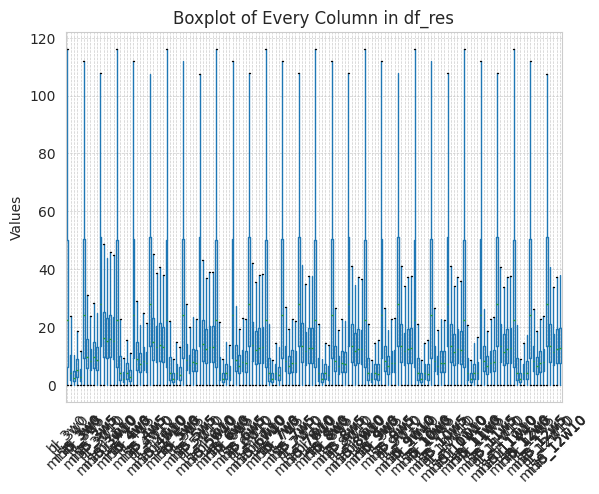

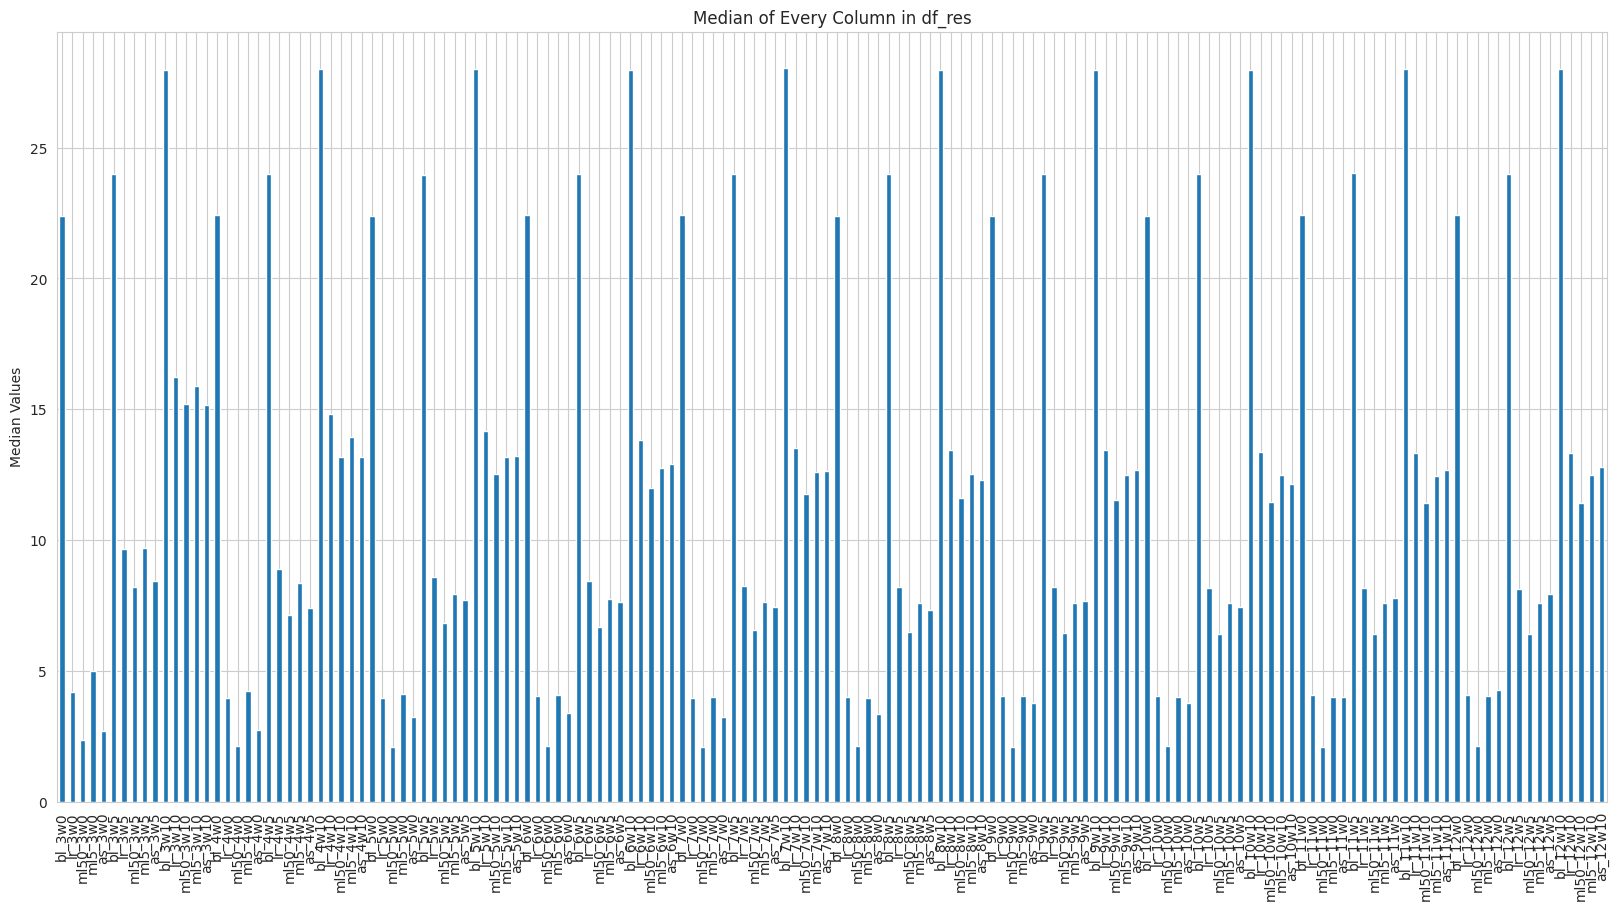

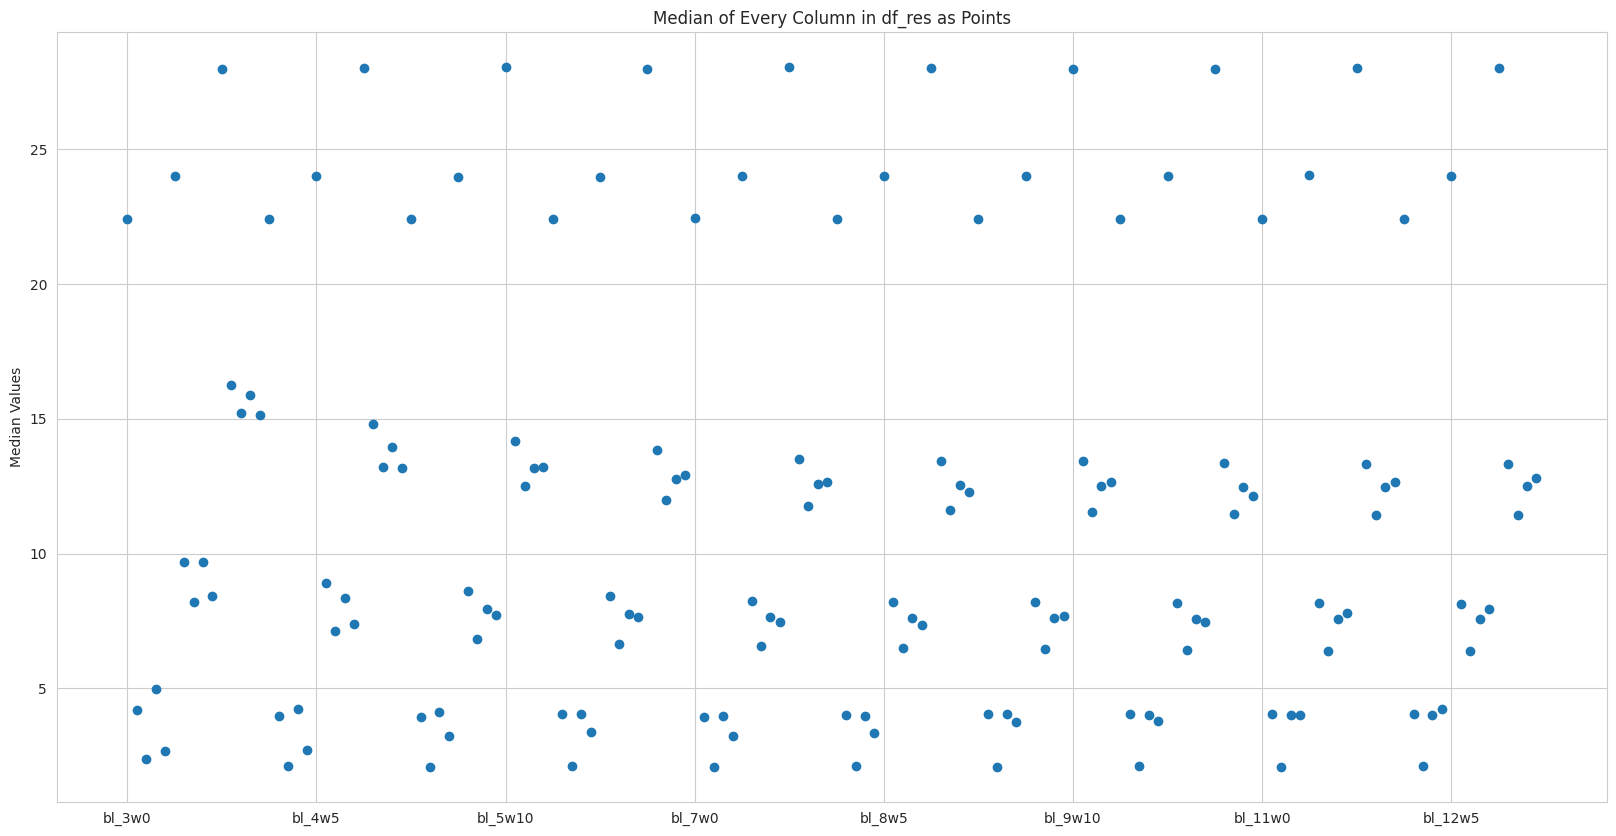

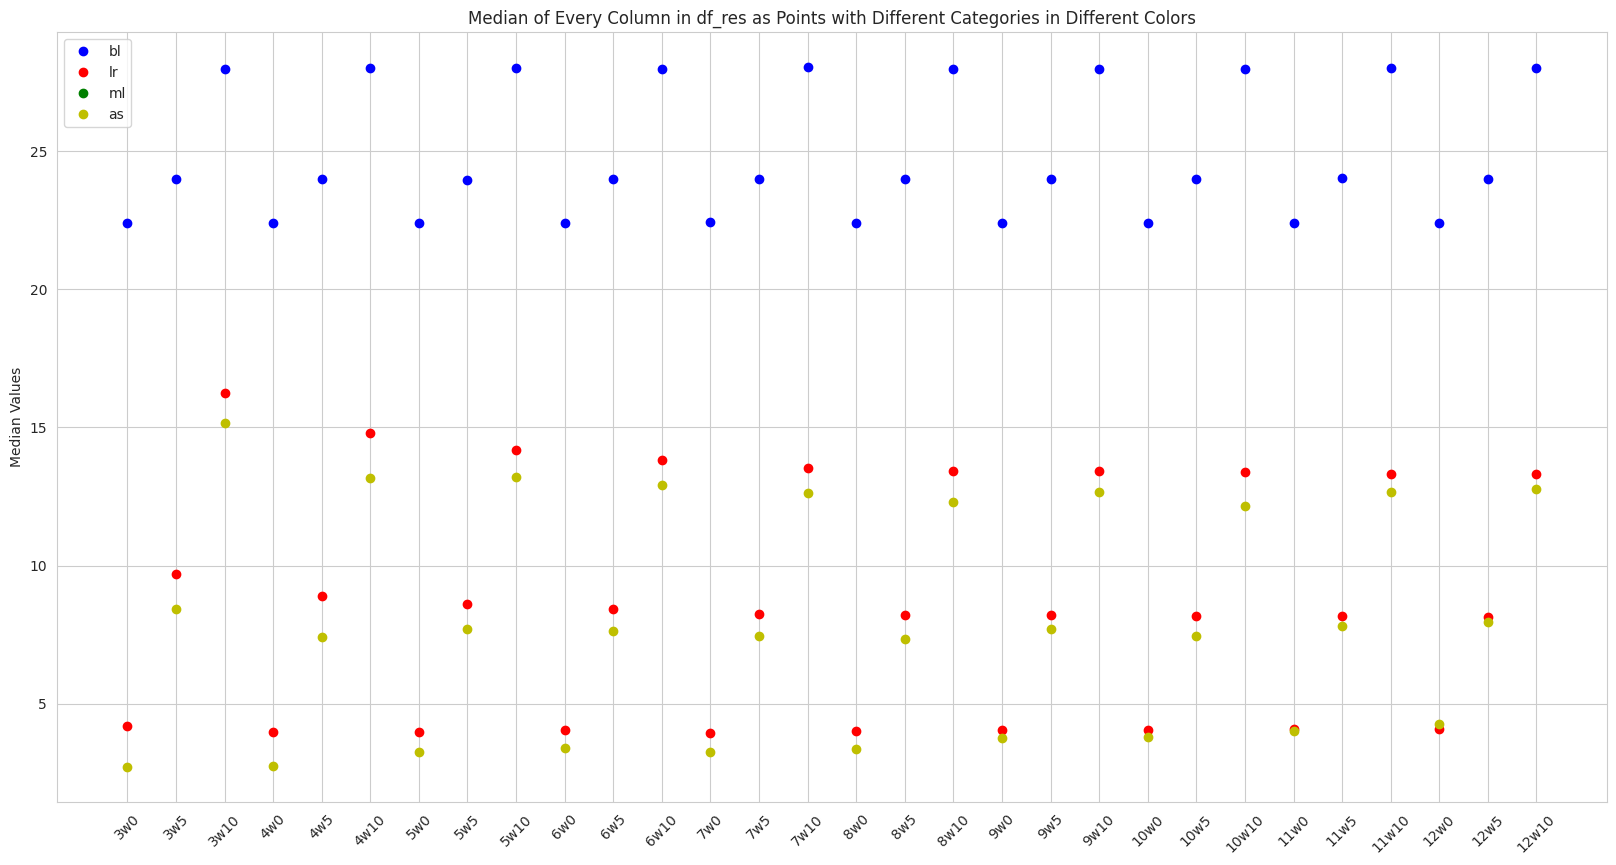

In [58]:
df_res.boxplot(rot=45, showfliers=False, figsize=(20, 10))
plt.ylabel('Values')
plt.title('Boxplot of Every Column in df_res')
plt.show()
df_res.median().plot(kind='bar', figsize=(20, 10))
plt.ylabel('Median Values')
plt.title('Median of Every Column in df_res')
plt.show()
df_res.median().plot(style='o', figsize=(20, 10))
plt.ylabel('Median Values')
plt.title('Median of Every Column in df_res as Points')
plt.show()
colors = {'bl': 'b', 'lr': 'r', 'ml': 'g', 'as': 'y'}

for alg in ['bl', 'lr', 'ml', 'as']:
    df_res.filter(regex=f'^{alg}_').median().plot(style='o', color=colors[alg], label=alg, figsize=(20, 10))

plt.ylabel('Median Values')
plt.title('Median of Every Column in df_res as Points with Different Categories in Different Colors')
plt.legend()

# Set xticks without "as_"
xticks_labels = [col.replace('as_', '') for col in df_res.columns if col.startswith('as_')]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45)

plt.show()

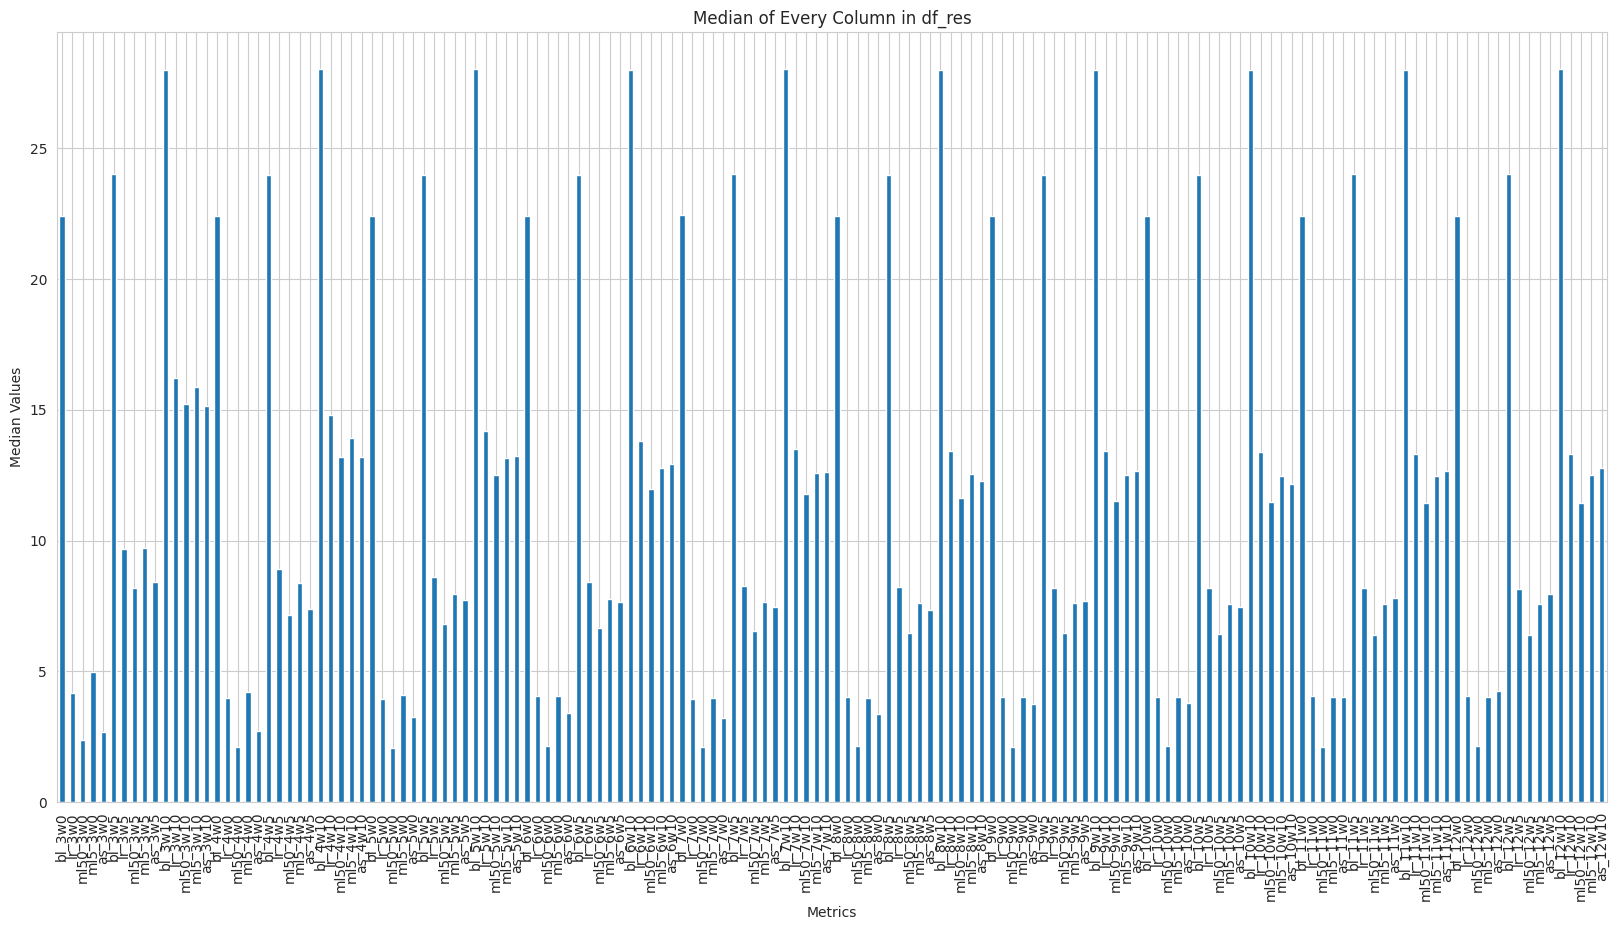

NameError: name 'np' is not defined

In [59]:
# Calculate the medians of the columns
medians = df_res.median()

# Plot the medians
medians.plot(kind='bar', figsize=(20, 10))

# Rename the x-axis metric
plt.xlabel('Metrics')

# Set the y-axis label
plt.ylabel('Median Values')

# Set the title of the plot
plt.title('Median of Every Column in df_res')

# Show the plot
plt.show()
# Add a slight wiggle to the x-axis positions to avoid overlap
x_positions = range(len(medians))
wiggle = 0.1 * (np.random.rand(len(medians)) - 0.5)

# Plot the medians with wiggle
plt.bar(x_positions + wiggle, medians, align='center')

# Rename the x-axis metric
plt.xlabel('Metrics')

# Set the y-axis label
plt.ylabel('Median Values')

# Set the title of the plot
plt.title('Median of Every Column in df_res')

# Show the plot
plt.show()

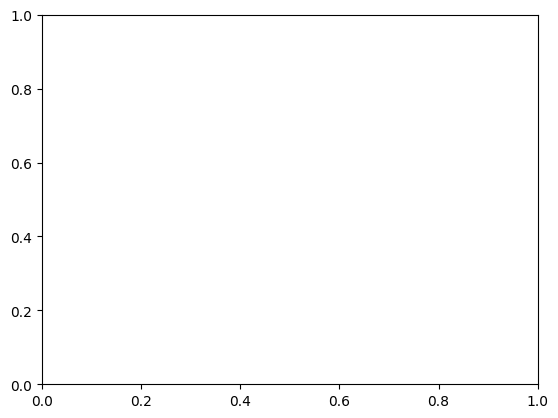

In [ ]:
# Time

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

filename = "aisdk-2023-11-08_1_knn"


folderoutput = f"../workdir/AIS-Images/{filename}_result_18000_10240/"

filename = filename + '_time2_18000_10240'

data =  pd.read_csv(f"../workdir/AIS-TrainedModel/{filename}.csv")
data.head()
other_x_values = data['pos']
laBel = {'in': 'Initialisierung', 'lr': 'Lineare Regression', 'ml': 'MLP Regressor', 'as': 'Auto Sklearn'}

for alg in ['in', 'ml', 'as', 'lr']: 
    other_y_values = data[f'{alg}']
    
    # plt.grid()
    markers = {'in': 'x', 'lr': 'v', 'ml': 's', 'as': 'p'}
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.scatter(other_x_values, other_y_values, label=laBel[alg], marker=markers[alg])
    # plt(label=alg)
    
    #plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.legend(loc = 'best')
    plt.ylabel('Zeit [Sek]')
    plt.xlabel('Positionen')
    
#plt.show
plt.savefig(f"{folderoutput}{filename}_time.png", bbox_inches='tight', dpi=600, transparent=True)
plt.cla()

In [1]:
# Modell Hyperparameter
import numpy as np
import pandas as pd
import pickle
from pprint import pprint
from pathlib import Path


folder = "../workdir/AIS-ModelFrames/"
# filename = "aisdk-2023-11-08-xs_3_knn"
filename = f"aisdk-2023-11-08_1_knn"
folderoutput = f"../workdir/AIS-Images/{filename}_result_18000_10240/"
# folderoutput = f"../workdir/AIS-Images/{filename}_result/"
# path = Path(f"{folderoutput}{filename}_hyper_mlp50.csv")

res = pd.DataFrame()

# model = "mlp"
model = "autosk"

for known in range(3, 13, 1):

    modelframe = pickle.load(open(f"../workdir/AIS-TrainedModel/{filename}_{model}_{known}_0_18000_10240.csv", 'rb'))
    # modelframe = pickle.load(open(f"../workdir/AIS-TrainedModel/{filename}_{model}_{known}_0.csv", 'rb'))
    # tmp = modelframe.get_params()
    tmp = modelframe.show_models()
    res[known] = tmp
    path = Path(f"{folderoutput}{filename}_hyper_{model}_{known}.csv")
    res.to_csv(path, index=False)
    res = pd.DataFrame()
# pprint(res, indent=4)

# res.to_csv(path, index=False)

In [ ]:

for i, (weight, pipeline) in enumerate(automl.get_models_with_weights()):
    for stage_name, component in pipeline.named_steps.items():
        if "feature_preprocessor" in stage_name:
            print(
                "The {}th pipeline has a explained variance of {}".format(
                    i,
                    # The component is an instance of AutoSklearnChoice.
                    # Access the sklearn object via the choice attribute
                    # We want the explained variance attributed of
                    # each principal component
                    component.choice.preprocessor.explained_variance_ratio_,
                )
            )